In [82]:
#import the neccesary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#load the given Case study CSV file

loan = pd.read_csv('D:\MLAI\Case Study\\loan.csv')
data = pd.read_excel('D:\MLAI\Case Study\\Data_Dictionary.xlsx')                         

#to verify the content of the data 
loan.head()


C:\Users\Manish.Hegde.INSPOLT017.000\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [83]:
#to check and verify the data of columns
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [84]:
#To check the shape of the data
loan.shape

(39717, 111)

In [85]:
#First checked the whether any data is missing in 'int_rate' column
loan['int_rate'].isnull().sum()
#Since in that column % was there written the code for remove the %
loan['int_rate'] =loan['int_rate'].str.replace('%','')
#printed the valued to check wthether % is removed or not and also to know the Median ,max and min
print(loan['int_rate'].median())
print(loan['int_rate'].max())
print(loan['int_rate'].min())

11.86
9.99
10.00


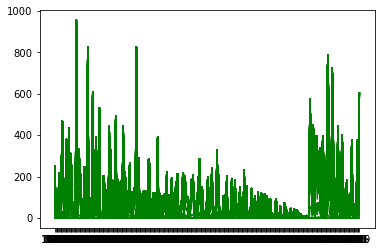

In [86]:
#made the groupby to check the pattern of intersert rates
loan_rate=loan.groupby('int_rate').count()
plt.plot(loan_rate.index,loan_rate,color='green')
plt.show()

In [87]:
#to check the sanity of "annual_inc"
loan['annual_inc'].isnull().sum()

0

In [88]:
#to check the max, median and minimum value
print(loan['annual_inc'].median())
print(loan['annual_inc'].max())
print(loan['annual_inc'].min())

59000.0
6000000.0
4000.0


In [89]:

print(loan['total_pymnt'].median())
print(loan['total_pymnt'].max())
print(loan['total_pymnt'].min())

9899.640319
58563.67993
0.0


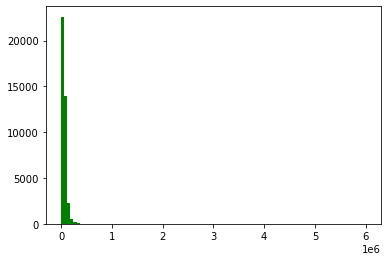

In [90]:
#ploted the histgram to see the spraed of 'annual income of 'loan borrower
Annual_inc=plt.hist(loan['annual_inc'],bins=100,range =[4000, 6000000],color='green')

plt.show()

In [91]:
#Since there is max value is 6000000, removed the outliners 5% from bottom and top
Q1 = loan['annual_inc'].quantile(0.05)
Q3 = loan['annual_inc'].quantile(0.95)
IQR = Q3 - Q1

loan['annual_inc']= loan['annual_inc'][~((loan['annual_inc'] < (Q1 - 1.5 * IQR)) | (loan['annual_inc'] > (Q3 + 1.5 * IQR)))]


In [92]:
#Check the new values after removing the outliners 
print(loan['annual_inc'].median())
print(loan['annual_inc'].max())
print(loan['annual_inc'].min())

58978.14
316800.0
4000.0


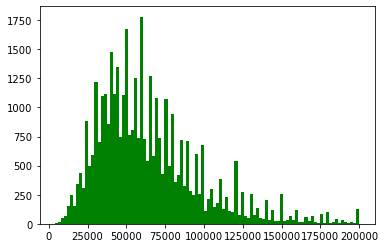

In [93]:
#after removing the outliner 
Annual_inc=plt.hist(loan['annual_inc'],bins=100,range =[4000, 200000],color='green')

plt.show()

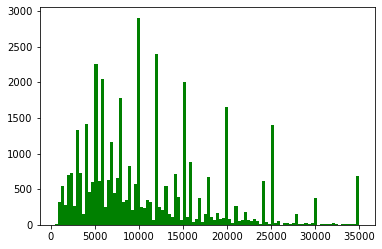

In [94]:
#Checking the histo for "Loan_amnt" to see the pattern "annual_inc"v/s 'loan amount'
Annual_inc=plt.hist(loan['loan_amnt'],bins=100,range =[500, 35000],color='green')

plt.show()

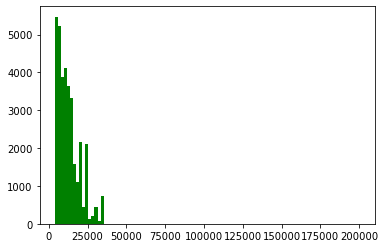

35000

In [95]:
#pattern for "loan amount"by keepung the range 4000 to 200000 
Annual_inc=plt.hist(loan['loan_amnt'],bins=100,range =[4000, 200000],color='green')

plt.show()
loan['loan_amnt'].max()

In [96]:
#Sanity check of the values
loan['chargeoff_within_12_mths'].isnull().sum()
loan['avg_cur_bal'].isnull().sum()
loan['avg_cur_bal'].isnull().sum()
#checked the data type 
loan['annual_inc'].dtype
#check for the any empty entries 
loan['loan_status'].isnull().sum()

0

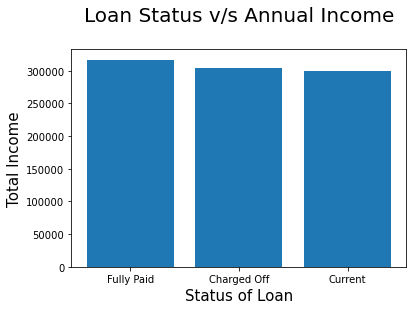

In [97]:
#Ploted the bar
plt.bar(loan['loan_status'],loan['annual_inc'])

plt.title("Loan Status v/s Annual Income\n",fontdict={"fontsize":20,"fontweight":10,"color":"black"})
plt.ylabel("Total Income",fontdict={'fontsize':15,'fontweight':5,'color':'black'})
plt.xlabel("Status of Loan",fontdict={'fontsize':15,'fontweight':5,'color':'black'})
plt.show()

In [98]:

#checking the loan status 
loan_Status=loan.groupby('loan_status').count()
loan_Status

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,...,0,0,0,0,5509,5626,0,0,0,0
Current,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,...,0,0,0,0,1140,1140,0,0,0,0
Fully Paid,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,...,0,0,0,0,32371,32912,0,0,0,0


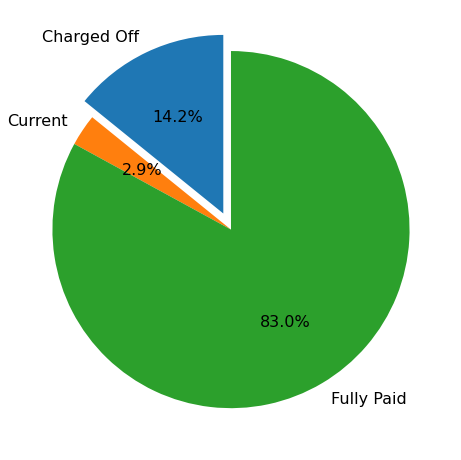

In [99]:
#ploting the pichart to know the % of loan status 
x_vals = []
y_vals = []
for i in [0, 1, 2]: 
    x_vals.append(loan_Status.index[i])
    y_vals.append(loan_Status.iloc[i,0])
plt.figure(figsize = [8,10])
plt.pie(loan_Status["id"],explode=(0.1,0,0),labels=x_vals,autopct='%1.1f%%',textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)
plt.show()

In [100]:
#checking the Verification status 
Verification_Status=loan.groupby('verification_status').count()
Verification_Status

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
verification_status,,,,,,,,,,,,,,,,,,,,,
Not Verified,16921,16921,16921,16921,16921,16921,16921,16921,16921,16921,...,0,0,0,0,16225,16882,0,0,0,0
Source Verified,9987,9987,9987,9987,9987,9987,9987,9987,9987,9987,...,0,0,0,0,9987,9987,0,0,0,0
Verified,12809,12809,12809,12809,12809,12809,12809,12809,12809,12809,...,0,0,0,0,12808,12809,0,0,0,0


In [101]:
#to know the name of index
Verification_Status.index

Index(['Not Verified', 'Source Verified', 'Verified'], dtype='object', name='verification_status')

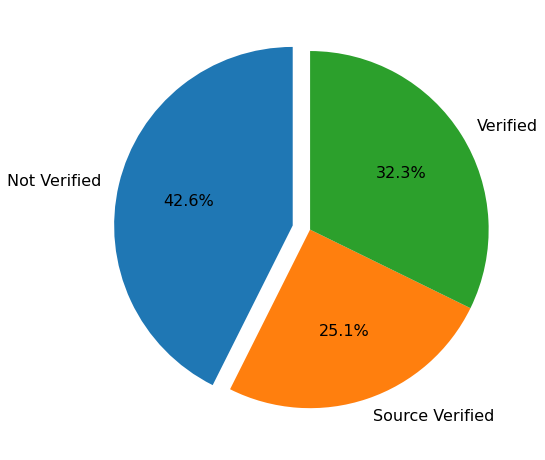

In [102]:
#ploting the pichart to know the % of loan status 
plt.figure(figsize = [8,10])
plt.pie(Verification_Status["id"],explode=(0.1,0,0),labels=Verification_Status.index,autopct='%1.1f%%',textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)
plt.show()

In [103]:
#mapped the data with verification with status of loan , to derive the result of verification
NotVerified_Charged  =loan[(loan['verification_status'] == 'Not Verified') & (loan['loan_status'] == 'Charged Off')]
NotVerified_Fullypaid  =loan[(loan['verification_status'] == 'Not Verified')& (loan['loan_status'] == 'Fully Paid')]
Verified_Charged  =loan[(loan['verification_status'] == 'Verified')& (loan['loan_status'] == 'Charged Off')]
Verified_Fullypaid  =loan[(loan['verification_status'] == 'Verified') & (loan['loan_status'] == 'Fully Paid')]
sourceVerified_Charged  =loan[(loan['verification_status'] == 'Source Verified') & (loan['loan_status'] == 'Charged Off')]
sourceVerified_Fullypaid  =loan[(loan['verification_status'] == 'Source Verified') & (loan['loan_status'] == 'Fully Paid')]

#sorted_data3 =sorted_data & sorted_data1
print('NotVerified_Charged off       :'     ,NotVerified_Charged.id.count())
print('Verified_Charged off          :'        ,Verified_Charged.id.count())
print('sourceVerified_Charged off    :'  ,sourceVerified_Charged.id.count())

print('NotVerified_Fullypaid         :'   , NotVerified_Fullypaid.id.count())
print('Verified_Fullypaid            :'      , Verified_Fullypaid.id.count())
print('sourceVerified_Fully Paid     :'          ,sourceVerified_Fullypaid.id.count())

NotVerified_Charged off       : 2142
Verified_Charged off          : 2051
sourceVerified_Charged off    : 1434
NotVerified_Fullypaid         : 14552
Verified_Fullypaid            : 10155
sourceVerified_Fully Paid     : 8243


<function matplotlib.pyplot.show(close=None, block=None)>

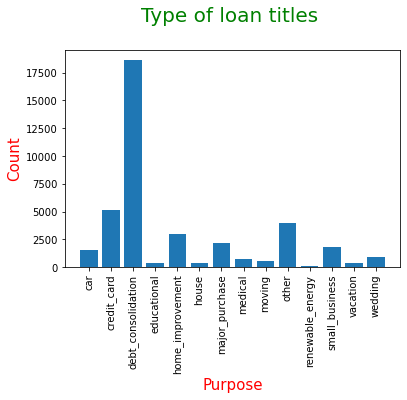

In [104]:
#written the code to understand the purpose of loan
title=loan.groupby('purpose').count()
plt.bar(title.index,title.id)
plt.xticks(rotation=90)
plt.title("Type of loan titles \n",fontdict={"fontsize":20,"fontweight":10,"color":"green"})
plt.xlabel("Purpose",fontdict={'fontsize':15,'fontweight':5,'color':'red'})
plt.ylabel("Count",fontdict={'fontsize':15,'fontweight':5,'color':'red'})
plt.show